In [141]:
import pandas as pd    #import several important packages which give us some useful features
import numpy as np
from sklearn import preprocessing

import seaborn as sns; sns.set()

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import scikitplot as skplt

from sklearn.naive_bayes import GaussianNB
import seaborn as sns

# Load Dataset

In [76]:
patients = pd.read_csv("processed.cleveland.data") #loding data
patients.head(len(patients))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [143]:
print(patients.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'goal'],
      dtype='object')


In [145]:
patients.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [77]:
patients.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
goal          int64
dtype: object

In [146]:
patients.shape

(303, 14)

In [144]:
patients.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
goal        0
dtype: int64

In [147]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          299 non-null float64
thal        301 non-null float64
goal        303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


In [148]:
patients.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
goal          5
dtype: int64

# Data Visualisation

# Gender distribution

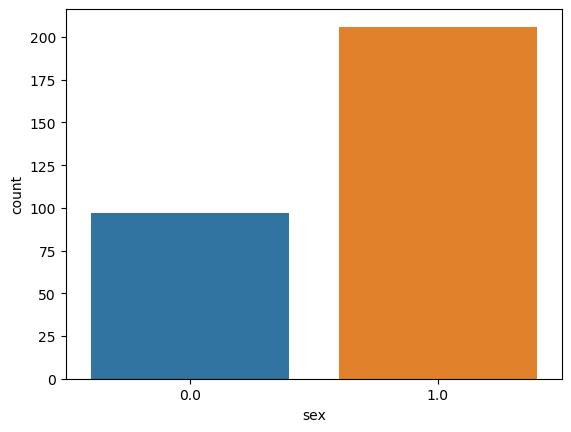

In [251]:
sns.countplot(x='sex',data=patients)

# Target/Goal Ratio

([<matplotlib.patches.Wedge at 0x1c72022a308>,
 [Text(-0.5922315099743025, -0.9269637741538542, 'No Heart Disease'),
  Text(2.081915635837559, 0.2750041549778697, 'Heart Disease Density 1'),
  Text(1.4751893050036682, 2.726502615880424, 'Heart Disease Density 2'),
  Text(-0.9753718883984508, 3.982292013316206, 'Heart Disease Density 3'),
  Text(-3.4308638627489296, 3.7734828945264205, 'Heart Disease Density 4')],
 [Text(-0.3230353690768923, -0.5056166040839204, '54.1%'),
  Text(1.5862214368286165, 0.20952697522123398, '18.2%'),
  Text(1.2372555461321086, 2.2867441294480977, '11.9%'),
  Text(-0.856424097130347, 3.49664664583862, '11.6%'),
  Text(-3.094504660518642, 3.4035335911414775, '4.3%')])

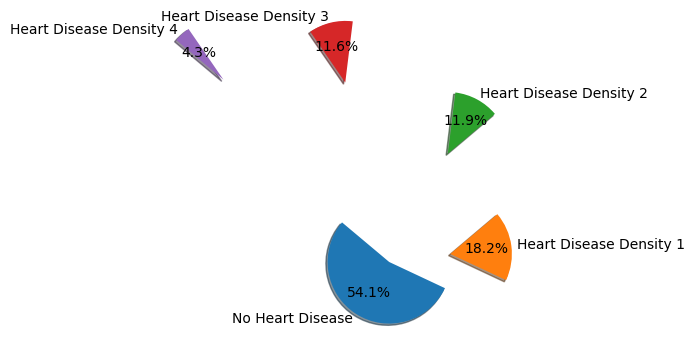

In [258]:
plt.figure(figsize=(3,2))
explode =[0,1,2,3,4]
labels='No Heart Disease','Heart Disease Density 1','Heart Disease Density 2','Heart Disease Density 3','Heart Disease Density 4'
plt.pie(patients['goal'].value_counts(),explode=explode,autopct='%1.1f%%',labels=labels,shadow=True,startangle=140)

# Data Correlation between variables

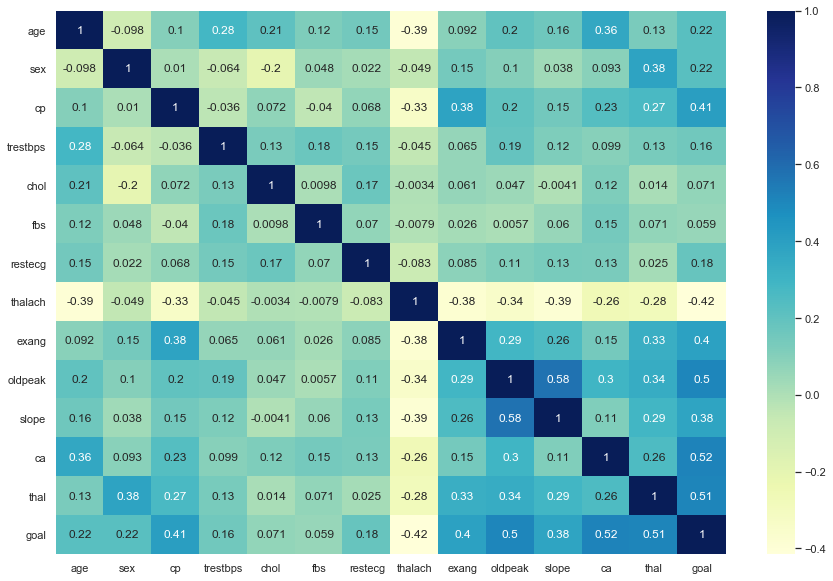

In [151]:
plt.figure(figsize=(15,10))
sns.heatmap(patients.corr(),annot=True,cmap='YlGnBu')

In [152]:
patients.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Data cleaning and preprocessing

The coloum ca and thal has dtype object,and has some missing values so try to replace with nan and then convert it to numeric. 

cleaning and pre processing of the data 

In [78]:
patients = patients.replace('?',np.nan) #replaced ? to actual np.nan value, 

In [153]:
patients.ca = patients.ca.apply(pd.to_numeric)
patients.thal = patients.thal.apply(pd.to_numeric) # object column ca and thal is converted to numerical 
patients.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
goal          int64
dtype: object

In [154]:
patients.shape

(303, 14)

In [155]:
patients.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          299 non-null float64
thal        301 non-null float64
goal        303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


In [156]:
print(patients.describe()) 

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

In [157]:
patients["ca"] 

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
5      0.0
6      2.0
7      0.0
8      1.0
9      0.0
10     0.0
11     0.0
12     1.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     2.0
24     2.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
273    0.0
274    2.0
275    0.0
276    1.0
277    0.0
278    1.0
279    0.0
280    1.0
281    0.0
282    1.0
283    0.0
284    1.0
285    3.0
286    2.0
287    NaN
288    0.0
289    0.0
290    0.0
291    0.0
292    0.0
293    2.0
294    0.0
295    0.0
296    2.0
297    0.0
298    0.0
299    2.0
300    1.0
301    1.0
302    NaN
Name: ca, Length: 303, dtype: float64

In [158]:
patients["goal"]

0      0
1      2
2      1
3      0
4      0
5      0
6      3
7      0
8      2
9      1
10     0
11     0
12     2
13     0
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     1
23     3
24     4
25     0
26     0
27     0
28     0
29     3
      ..
273    0
274    1
275    0
276    0
277    0
278    1
279    0
280    2
281    0
282    3
283    0
284    2
285    4
286    2
287    0
288    0
289    0
290    1
291    0
292    2
293    2
294    1
295    0
296    3
297    1
298    1
299    2
300    3
301    1
302    0
Name: goal, Length: 303, dtype: int64

In [159]:
patients.isnull().sum()    #sum of missing values per column

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
goal        0
dtype: int64

In [160]:
heartpatients = patients.copy()  #now try replace with median of attributes
heartpatients.fillna(heartpatients.median(), inplace=True)

In [161]:
heartpatients.head(len(heartpatients)) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


# Data Normailization

In [88]:
x = heartpatients.values

In [89]:
print (x)

[[63.  1.  1. ...  0.  6.  0.]
 [67.  1.  4. ...  3.  3.  2.]
 [67.  1.  4. ...  2.  7.  1.]
 ...
 [57.  1.  4. ...  1.  7.  3.]
 [57.  0.  2. ...  1.  3.  1.]
 [38.  1.  3. ...  0.  3.  0.]]


In [90]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
heartpatientsnorm = pd.DataFrame(x_scaled, columns=heartpatients.columns)

In [91]:
heartpatientsnorm.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
goal        float64
dtype: object

In [92]:
heartpatientsnorm['Sex'] = heartpatients.sex.astype(int)
heartpatientsnorm['fbs'] = heartpatients.fbs.astype(int)
heartpatientsnorm['exang'] = heartpatients.exang.astype(int)
heartpatientsnorm['goal'] = heartpatients.goal.astype(int)

In [93]:
heartpatientsnorm.head(len(heartpatientsnorm))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal,Sex
0,0.708333,1.0,0.000000,0.481132,0.244292,1,1.0,0.603053,0,0.370968,1.0,0.000000,0.75,0,1
1,0.791667,1.0,1.000000,0.622642,0.365297,0,1.0,0.282443,1,0.241935,0.5,1.000000,0.00,2,1
2,0.791667,1.0,1.000000,0.245283,0.235160,0,1.0,0.442748,1,0.419355,0.5,0.666667,1.00,1,1
3,0.166667,1.0,0.666667,0.339623,0.283105,0,0.0,0.885496,0,0.564516,1.0,0.000000,0.00,0,1
4,0.250000,0.0,0.333333,0.339623,0.178082,0,1.0,0.770992,0,0.225806,0.0,0.000000,0.00,0,0
5,0.562500,1.0,0.333333,0.245283,0.251142,0,0.0,0.816794,0,0.129032,0.0,0.000000,0.00,0,1
6,0.687500,0.0,1.000000,0.433962,0.324201,0,1.0,0.679389,0,0.580645,1.0,0.666667,0.00,3,0
7,0.583333,0.0,1.000000,0.245283,0.520548,0,0.0,0.702290,1,0.096774,0.0,0.000000,0.00,0,0
8,0.708333,1.0,1.000000,0.339623,0.292237,0,1.0,0.580153,0,0.225806,0.5,0.333333,1.00,2,1
9,0.500000,1.0,1.000000,0.433962,0.175799,1,1.0,0.641221,1,0.500000,1.0,0.000000,1.00,1,1


In [94]:
heartpatientsnorm.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs           int32
restecg     float64
thalach     float64
exang         int32
oldpeak     float64
slope       float64
ca          float64
thal        float64
goal          int32
Sex           int32
dtype: object

Assigning attributes (x) and class labels (y).

In [95]:
heartpatientsnorm['Sex'].value_counts()

1    206
0     97
Name: Sex, dtype: int64

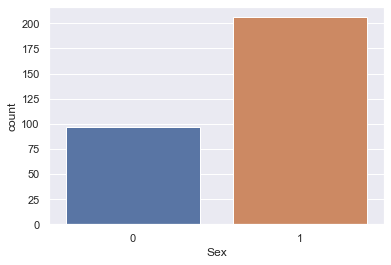

In [96]:
sns.countplot(x='Sex',data=heartpatientsnorm)

In [97]:
heartpatientsnorm['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [98]:
heartpatientsnorm['goal'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: goal, dtype: int64

In [99]:
x = heartpatientsnorm.drop('goal',axis =1)
y = heartpatientsnorm['goal']

In [100]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Sex
0,0.708333,1.0,0.000000,0.481132,0.244292,1,1.0,0.603053,0,0.370968,1.0,0.000000,0.75,1
1,0.791667,1.0,1.000000,0.622642,0.365297,0,1.0,0.282443,1,0.241935,0.5,1.000000,0.00,1
2,0.791667,1.0,1.000000,0.245283,0.235160,0,1.0,0.442748,1,0.419355,0.5,0.666667,1.00,1
3,0.166667,1.0,0.666667,0.339623,0.283105,0,0.0,0.885496,0,0.564516,1.0,0.000000,0.00,1
4,0.250000,0.0,0.333333,0.339623,0.178082,0,1.0,0.770992,0,0.225806,0.0,0.000000,0.00,0
5,0.562500,1.0,0.333333,0.245283,0.251142,0,0.0,0.816794,0,0.129032,0.0,0.000000,0.00,1
6,0.687500,0.0,1.000000,0.433962,0.324201,0,1.0,0.679389,0,0.580645,1.0,0.666667,0.00,0
7,0.583333,0.0,1.000000,0.245283,0.520548,0,0.0,0.702290,1,0.096774,0.0,0.000000,0.00,0
8,0.708333,1.0,1.000000,0.339623,0.292237,0,1.0,0.580153,0,0.225806,0.5,0.333333,1.00,1
9,0.500000,1.0,1.000000,0.433962,0.175799,1,1.0,0.641221,1,0.500000,1.0,0.000000,1.00,1


In [101]:
y # goal the intensity of the stroke (0-4).

0      0
1      2
2      1
3      0
4      0
5      0
6      3
7      0
8      2
9      1
10     0
11     0
12     2
13     0
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     1
23     3
24     4
25     0
26     0
27     0
28     0
29     3
      ..
273    0
274    1
275    0
276    0
277    0
278    1
279    0
280    2
281    0
282    3
283    0
284    2
285    4
286    2
287    0
288    0
289    0
290    1
291    0
292    2
293    2
294    1
295    0
296    3
297    1
298    1
299    2
300    3
301    1
302    0
Name: goal, Length: 303, dtype: int32

In [102]:
y = heartpatientsnorm['goal']
y = y.replace ([1,2,3,4],1)

In [103]:
y  #to replace the value 1 to 4 as 1

0      0
1      1
2      1
3      0
4      0
5      0
6      1
7      0
8      1
9      1
10     0
11     0
12     1
13     0
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     1
25     0
26     0
27     0
28     0
29     1
      ..
273    0
274    1
275    0
276    0
277    0
278    1
279    0
280    1
281    0
282    1
283    0
284    1
285    1
286    1
287    0
288    0
289    0
290    1
291    0
292    1
293    1
294    1
295    0
296    1
297    1
298    1
299    1
300    1
301    1
302    0
Name: goal, Length: 303, dtype: int32

In [104]:
y.value_counts()

0    164
1    139
Name: goal, dtype: int64

# Data Visulisation

# Target/Goal Ratio

([<matplotlib.patches.Wedge at 0x1c71fcd3588>,
 [Text(-0.5922315099743025, -0.9269637741538542, 'No Heart Disease'),
  Text(1.1306239574564683, 1.7696580084370748, 'Heart Disease Precense')],
 [Text(-0.3230353690768923, -0.5056166040839204, '54.1%'),
  Text(0.8614277771096901, 1.3483108635711045, '45.9%')])

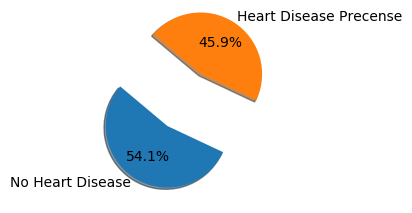

In [259]:
plt.figure(figsize=(3,2))
explode =[0,1]
labels='No Heart Disease','Heart Disease Precense'
plt.pie(y.value_counts(),explode=explode,autopct='%1.1f%%',labels=labels,shadow=True,startangle=140)

# Partitioning data in to train and test sets.

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [109]:
print('Training data : {},{} '.format(X_train.shape, y_train.shape))
print('Testing data : {},{} '.format(X_test.shape, y_test.shape))

Training data : (242, 14),(242,) 
Testing data : (61, 14),(61,) 


# Classification Models

1- Decision Tree Classifier- Penena
2- Random Forest Classifier - Jyoti

3- KNN Classifier - Neha

4- Support Vector Machines SVM - Jack

5- Gaussian Naive Bayes - Ahmed

In [197]:
#This is a List to store the accuracy value for all models we are going to build and use it when compare theses models.
models_accuracy_list = []

# Random Forest Classifier - Jyoti

Building and evaluating Random Forest - Holdout(70/30)

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [199]:
forest = RandomForestClassifier(n_estimators=100, max_depth=2, criterion='entropy', random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [200]:
ypredbag = forest.predict(X_test)
rf_accuracy = forest.score(X_test,y_test)
print(rf_accuracy)

0.8032786885245902


Classification Report

In [201]:
print(metrics.classification_report(y_test, ypredbag)) # testing on y with trained test data x.

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.85      0.65      0.74        26

    accuracy                           0.80        61
   macro avg       0.82      0.78      0.79        61
weighted avg       0.81      0.80      0.80        61



Confusion Matrix

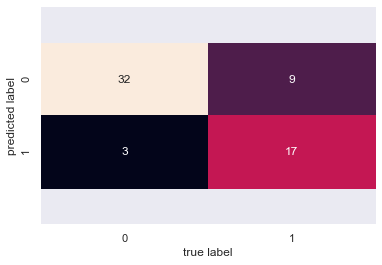

In [202]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ypredbag)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

 Building and evaluating Random Forest - Cross Validation/k-fold (k=10)

In [203]:
forest_CV = RandomForestClassifier(n_estimators=100, max_depth=2, criterion='entropy', random_state=0)
RF_model_scores = cross_val_score(forest_CV, x, y, cv=10, scoring='accuracy')
print("Accuracy values for K-fold :" , RF_model_scores)
print("Accuracy of Rf Model: %0.2f (+/- %0.2f)" % ((RF_model_scores.mean())*100, RF_model_scores.std() * 1.96))
RF_model_accuracy = RF_model_scores.mean() *100

models_accuracy_list.append(RF_model_accuracy)

Accuracy values for K-fold : [0.83870968 0.87096774 0.87096774 0.93333333 0.86666667 0.8
 0.83333333 0.83333333 0.73333333 0.83333333]
Accuracy of Rf Model: 84.14 (+/- 0.10)


# Decision Tree Classifier- Penena

Building and evaluating Decision Tree - Holdout(70/30)

In [204]:
from sklearn import tree
from sklearn import metrics

In [205]:
decisiontree = tree.DecisionTreeClassifier(random_state=0, max_depth=3, criterion='entropy')
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(167.4, 190.26, 'X[2] <= 0.833\nentropy = 0.997\nsamples = 242\nvalue = [129, 113]'),
 Text(83.7, 135.9, 'X[12] <= 0.375\nentropy = 0.738\nsamples = 125\nvalue = [99, 26]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 0.573\nentropy = 0.446\nsamples = 86\nvalue = [78, 8]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.216\nsamples = 58\nvalue = [56, 2]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.75\nsamples = 28\nvalue = [22, 6]'),
 Text(125.55000000000001, 81.53999999999999, 'X[7] <= 0.462\nentropy = 0.996\nsamples = 39\nvalue = [21, 18]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.96\nsamples = 34\nvalue = [21, 13]'),
 Text(251.10000000000002, 135.9, 'X[11] <= 0.167\nentropy = 0.821\nsamples = 117\nvalue = [30, 87]'),
 Text(209.25, 81.53999999999999, 'X[8] <= 0.5\nentropy = 0.994\nsamples = 57\nvalue = [26, 31]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.85\

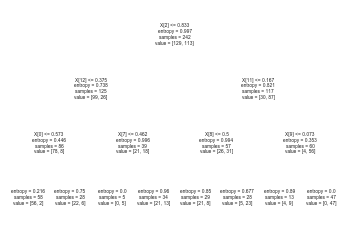

In [206]:
tree.plot_tree(decisiontree.fit(X_train, y_train)) 

Classification Report

In [207]:
ypred = decisiontree.predict(X_test)
print(metrics.classification_report(y_test, ypred)) # to make prediction on the test data.

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.77      0.65      0.71        26

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



In [208]:
decisiontree_accuracy = decisiontree.score(X_test,y_test)
print(decisiontree_accuracy)

0.7704918032786885


Confusion Matrix

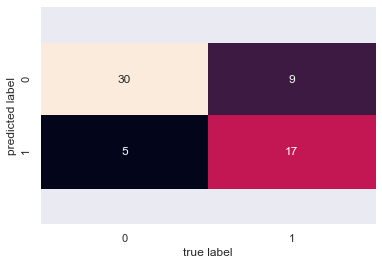

In [209]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

Building and evaluating Decision Tree - Cross Validation/k-fold (k=10)

In [210]:
DT_classfier = tree.DecisionTreeClassifier(random_state=0, max_depth=3, criterion='entropy')
DT_model_scores = cross_val_score(DT_classfier, x, y, cv=10, scoring='accuracy')
print("Accuracy values for K-fold :" , DT_model_scores)
print("Accuracy of DT Model: %0.2f (+/- %0.2f)" % ((DT_model_scores.mean())*100, DT_model_scores.std() * 1.96))
DT_model_accuracy = DT_model_scores.mean() *100

models_accuracy_list.append(DT_model_accuracy)

Accuracy values for K-fold : [0.77419355 0.80645161 0.90322581 0.9        0.83333333 0.8
 0.76666667 0.6        0.73333333 0.83333333]
Accuracy of DT Model: 79.51 (+/- 0.16)


# KNN Classifier - Neha

Building and evaluating KNN - Holdout(70/30)

In [211]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Classification Report

In [212]:
ypred = knn.predict(X_test) # predict on the test data                                             
print(metrics.classification_report(y_test, ypred)) # evaluate the algorithm

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.77      0.65      0.71        26

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



In [213]:
knn_accuracy = knn.score(X_test,y_test)
print(knn_accuracy)

0.7704918032786885


Confusion Matrix

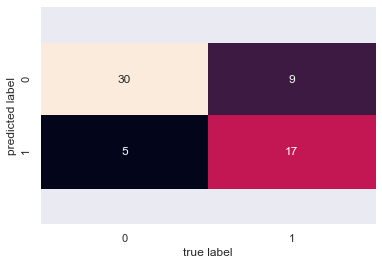

In [214]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

Building and evaluating KNN - Cross Validation/k-fold (k=10) 

In [215]:
knn_CV = KNeighborsClassifier(n_neighbors=5)
knn_model_scores = cross_val_score(knn_CV, x, y, cv=10, scoring='accuracy')
print("Accuracy values for K-fold :" , knn_model_scores)
print("Accuracy of DT Model: %0.2f (+/- %0.2f)" % ((knn_model_scores.mean())*100, knn_model_scores.std() * 1.96))
knn_model_accuracy = knn_model_scores.mean() *100

models_accuracy_list.append(knn_model_accuracy)

Accuracy values for K-fold : [0.80645161 0.80645161 0.80645161 0.86666667 0.76666667 0.8
 0.76666667 0.9        0.7        0.83333333]
Accuracy of DT Model: 80.53 (+/- 0.10)


# Support Vector Machines SVM - Jack¶

Building and evaluating SVM - Holdout(70/30)

In [216]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
#svm = SVC(kernel='poly', gamma='auto')
#svm = SVC(kernel='rbf', gamma='auto')

svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Classification Report

In [217]:
ypred = svm.predict(X_test) # predict on the test data
                                             
print(metrics.classification_report(y_test, ypred)) # evaluate the algorithm


              precision    recall  f1-score   support

           0       0.79      0.89      0.84        35
           1       0.82      0.69      0.75        26

    accuracy                           0.80        61
   macro avg       0.81      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



In [218]:
svm_accuracy = svm.score(X_test,y_test)
print(svm_accuracy)

0.8032786885245902


Confusion Matrix

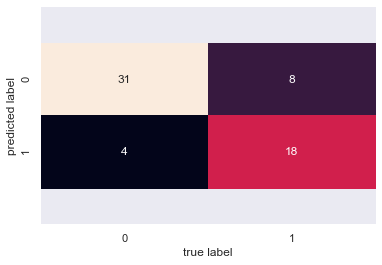

In [219]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

Building and evaluating SVM - Cross Validation/k-fold (k=10)

In [220]:
svm_CV = SVC(kernel='linear')
SVM_model_scores = cross_val_score(svm_CV, x, y, cv=10, scoring='accuracy')
print("Accuracy values for K-fold :" , SVM_model_scores)
print("Accuracy of SVM Model: %0.2f (+/- %0.2f)" % ((SVM_model_scores.mean())*100, SVM_model_scores.std() * 1.96))
SVM_model_accuracy = SVM_model_scores.mean() *100

models_accuracy_list.append(SVM_model_accuracy)

Accuracy values for K-fold : [0.87096774 0.83870968 0.83870968 0.96666667 0.83333333 0.73333333
 0.86666667 0.86666667 0.73333333 0.86666667]
Accuracy of SVM Model: 84.15 (+/- 0.13)


# Gaussian Naive Bayes - Ahmed

Building and evaluating GNB - Holdout(70/30)

In [221]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [222]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Classification Report

In [223]:
ypred = GNB.predict(X_test)
print(metrics.classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        35
           1       0.82      0.69      0.75        26

    accuracy                           0.80        61
   macro avg       0.81      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



Confusion Matrix

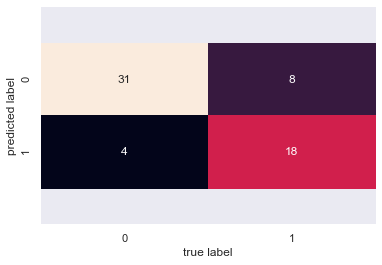

In [224]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

Building and evaluating SVM - Cross Validation/k-fold (k=10)

In [225]:
GNB_CV = GaussianNB()
GNB_model_scores = cross_val_score(GNB_CV, x, y, cv=10, scoring='accuracy')
print("Accuracy values for K-fold :" , GNB_model_scores)
print("Accuracy of SVM Model: %0.2f (+/- %0.2f)" % ((GNB_model_scores.mean())*100, GNB_model_scores.std() * 1.96))
GNB_model_accuracy = GNB_model_scores.mean() *100

models_accuracy_list.append(GNB_model_accuracy)

Accuracy values for K-fold : [0.80645161 0.83870968 0.87096774 0.93333333 0.8        0.7
 0.9        0.9        0.76666667 0.86666667]
Accuracy of SVM Model: 83.83 (+/- 0.13)


# Classification Models Comparison (5 Models)

Models Accuracy

In [226]:
label = ['Random Forest', 'Decision Tree ', 'KNN', 'Support Vector Machines-SVM', 'Gaussian Naive Bayes']
model_acuracy_value = pd.Series(data = models_accuracy_list, index = label)
print("Models Acuracy Values: ")
print("######################################################")
print(model_acuracy_value)

Models Acuracy Values: 
######################################################
Random Forest                  84.139785
Decision Tree                  79.505376
KNN                            80.526882
Support Vector Machines-SVM    84.150538
Gaussian Naive Bayes           83.827957
dtype: float64


Ploting Models Accuracy (Bar Chart)

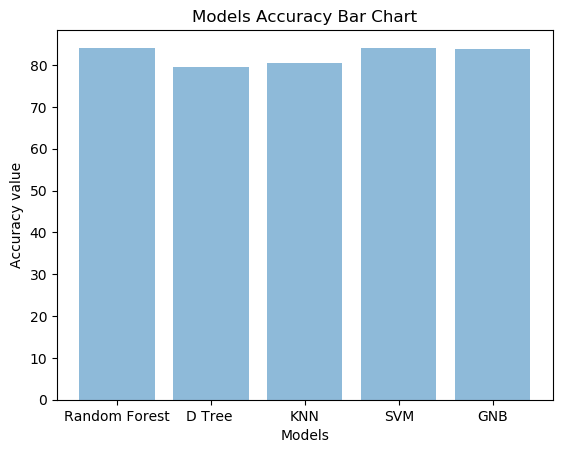

In [229]:
import matplotlib.pyplot as plt; plt.rcdefaults()

models_label = ['Random Forest', 'D Tree ', 'KNN', 'SVM', 'GNB']
y_pos = np.arange(len(models_label))

plt.bar(y_pos, model_acuracy_value, align='center', alpha=0.5)
plt.xticks(y_pos, models_label)
plt.xlabel('Models')
plt.ylabel('Accuracy value')
plt.title('Models Accuracy Bar Chart')

plt.show()

# Models AUC

In [244]:
def data_preprocessing(patients_data):
    # Data cleaning and preprocessing
    patients = patients_data.copy()

    patients = patients.replace('?', np.nan)
    patients.ca = patients.ca.apply(pd.to_numeric)
    patients.thal = patients.thal.apply(pd.to_numeric)

    patients_data = patients.copy()
    patients_data.fillna(patients_data.median(), inplace=True)

    # Data Normailization
    x = patients_data.values

    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    patients_data_norm = pd.DataFrame(x_scaled, columns=patients_data.columns)

    patients_data_norm['sex'] = patients_data.sex.astype(int)
    patients_data_norm['fbs'] = patients_data.sex.astype(int)
    patients_data_norm['exang'] = patients_data.sex.astype(int)
    patients_data_norm['goal'] = patients_data.sex.astype(int)

    # splitting data for training and testing

    patients = patients_data.copy()
    X = patients.drop('goal', axis=1)
    Y = patients['goal']
    
    Y = Y.replace ([1,2,3,4],1)

    return X, Y

# Deployment of The Best Performing Model

Now we have decided about best classification model, we have to train it with whole dataset:

In [245]:
# Loading cleveland Dataset
patients_data = pd.read_csv("processed.cleveland.data")

patients_data_features, patients_data_target = data_preprocessing(patients_data)

# Create a svm Classifier
SVM_classfier = SVC(kernel='linear')

# Train the model
SVM_classfier.fit(patients_data_features, patients_data_target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In order to tset this model, we have to upload/read new dataset Later we have to get this data as a user input from the web-based Clinical Dashboard)

In [246]:
testpatients1 = pd.read_csv('HDpatient_test1.csv')
testpatients2 = pd.read_csv('HDpatient_test2.csv')

Next we have to run the same data preprocessing steps on the this new dataset, therfore it better to build a function and then call it here

In [249]:
data_features, data_target = data_preprocessing(testpatients1)
#data_features, data_target = data_preprocessing(testpatients2)

# Predict the response for test dataset
y_pred = SVM_classfier.predict(data_features)

Finally, we can test the result of the selected classifier model (prediction result) on above loaded patient data

In [250]:
# Print the data
print('Classification value:')
print(y_pred)

if y_pred == 0:
    calssification_result = 'No Heart Disease presence'
else:
    calssification_result = 'Heart Disease presence'

    
print('Final patient classification....')
print(calssification_result)

Classification value:
[0]
Final patient classification....
No Heart Disease presence
